In [1]:
import pandas as pd

file_path = '../data/raw/AAPL_price_history.csv'

In [2]:
df = pd.read_csv(file_path, index_col= "Date", parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1999-11-02,78.00,81.69,77.31,80.25,3564600.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-05,84.62,88.37,84.00,88.31,3721500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6482 entries, 1999-11-01 to 2025-08-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6482 non-null   float64
 1   High    6482 non-null   float64
 2   Low     6482 non-null   float64
 3   Close   6482 non-null   float64
 4   Volume  6482 non-null   float64
dtypes: float64(5)
memory usage: 303.8 KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,6482.000000,6482.000000,6482.000000,6482.000000,6.482000e+03
mean,175.657354,177.609324,173.623375,175.678039,3.379905e+07
std,145.102399,146.299831,143.714127,145.043596,3.061930e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,84.457500,85.605000,83.052500,84.415000,1.251852e+07
50%,143.065000,144.500000,141.160500,143.005000,2.550490e+07
75%,209.967500,212.137500,207.735000,209.917500,4.569887e+07
max,702.410000,705.070000,699.570000,702.100000,3.326072e+08


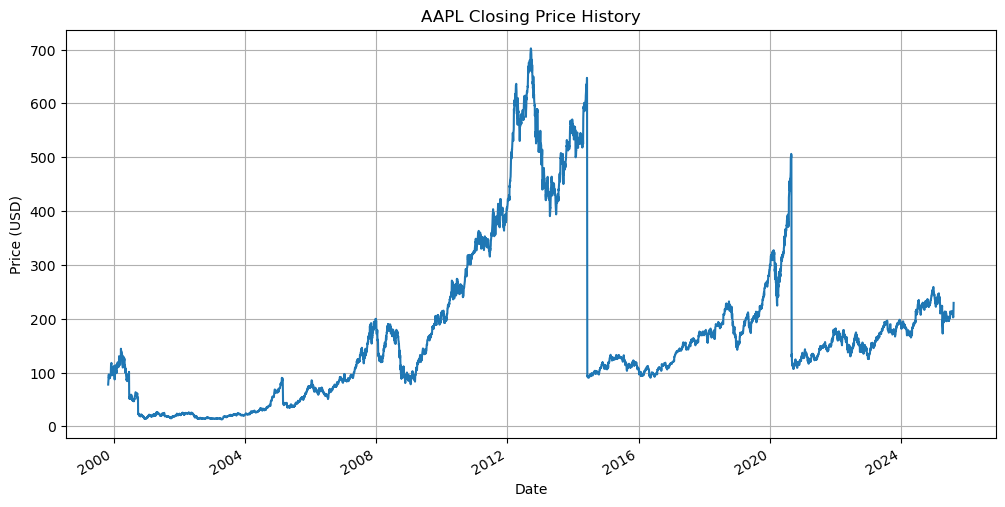

In [6]:
import matplotlib.pyplot as plt

# Plot the 'Close' column from your DataFrame
df['Close'].plot(figsize=(12, 6))

# Add a title and labels to make the chart clear
plt.title('AAPL Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True) # Adds a grid for easier reading

# Show the plot
plt.show()

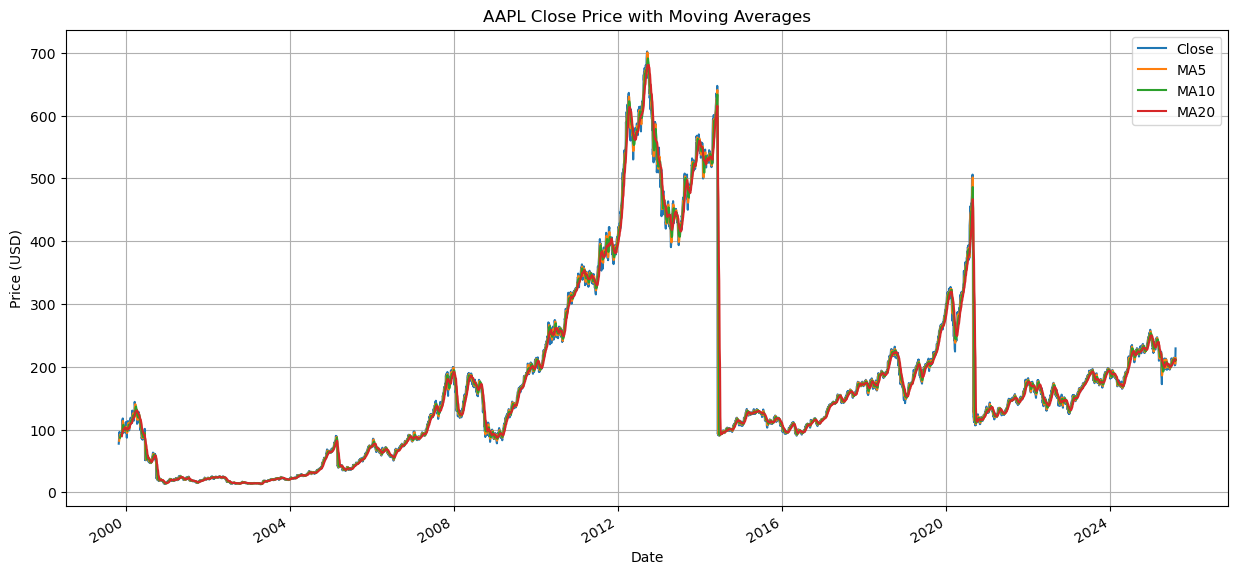

In [7]:
# Calculate 50-day and 200-day moving averages
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# Plot everything together
df[['Close', 'MA5','MA10', 'MA20']].plot(figsize=(15, 7), title='AAPL Close Price with Moving Averages')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

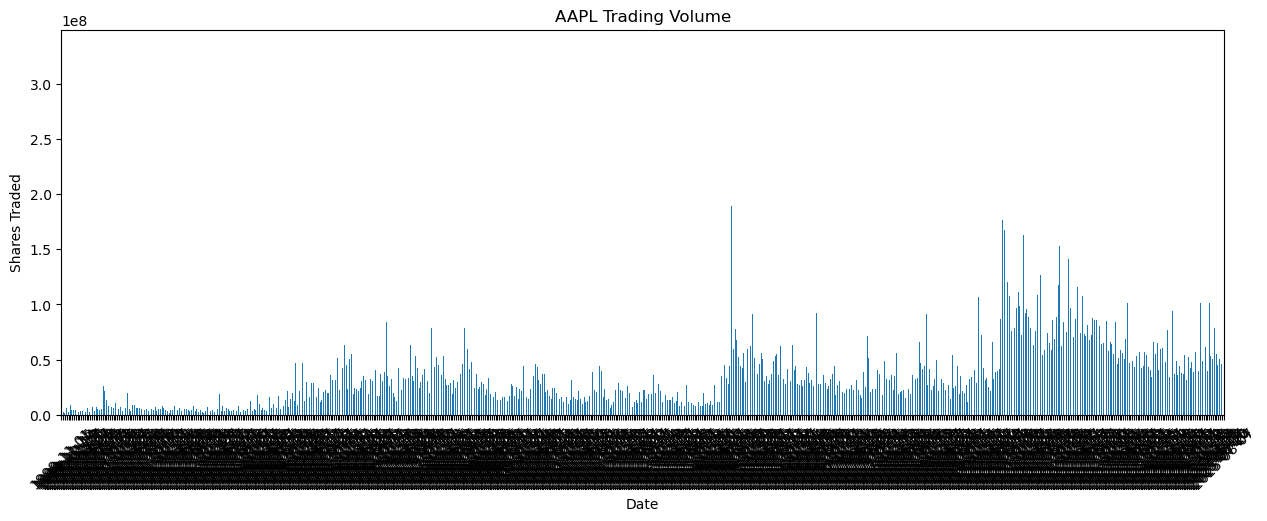

In [8]:
# Create a bar chart for the 'Volume' column
df['Volume'].plot(kind='bar', figsize=(15, 5))

# Add a title and labels
plt.title('AAPL Trading Volume')
plt.xlabel('Date')
plt.ylabel('Shares Traded')

# This part is tricky because a bar chart with 100 bars is unreadable.
# Let's just show the x-axis ticks for every 10th day to clean it up.
plt.xticks(range(0, len(df.index), 10), df.index[::10].strftime('%Y-%m-%d'), rotation=45)

plt.show()

In [9]:
# Calculate the daily percentage change of the 'Close' price
df['Daily_Return'] = df['Close'].pct_change()

# Display the DataFrame with the new 'Daily_Return' column
# You'll see 'NaN' for the very first day because there's no previous day to compare it to.
df.head()

,Open,High,Low,Close,Volume,MA5,MA10,MA20,Daily_Return
Date,,,,,,,,,
1999-11-01,80.00,80.69,77.37,77.62,2487300.0,NaN,NaN,NaN,NaN
1999-11-02,78.00,81.69,77.31,80.25,3564600.0,NaN,NaN,NaN,0.033883
1999-11-03,81.62,83.25,81.00,81.50,2932700.0,NaN,NaN,NaN,0.015576
1999-11-04,82.06,85.37,80.62,83.62,3384700.0,NaN,NaN,NaN,0.026012
1999-11-05,84.62,88.37,84.00,88.31,3721500.0,82.26,NaN,NaN,0.056087


In [10]:
# Calculate the percentage difference between High and Low
df['Volatility'] = (df['High'] - df['Low']) / df['Low'] * 100

# Look at the first few rows with the new column
df.head()

,Open,High,Low,Close,Volume,MA5,MA10,MA20,Daily_Return,Volatility
Date,,,,,,,,,,
1999-11-01,80.00,80.69,77.37,77.62,2487300.0,NaN,NaN,NaN,NaN,4.291069
1999-11-02,78.00,81.69,77.31,80.25,3564600.0,NaN,NaN,NaN,0.033883,5.665503
1999-11-03,81.62,83.25,81.00,81.50,2932700.0,NaN,NaN,NaN,0.015576,2.777778
1999-11-04,82.06,85.37,80.62,83.62,3384700.0,NaN,NaN,NaN,0.026012,5.891838
1999-11-05,84.62,88.37,84.00,88.31,3721500.0,82.26,NaN,NaN,0.056087,5.202381


In [11]:
# Calculate the percentage change from Open to Close
df['Intraday_Move'] = (df['Close'] - df['Open']) / df['Open'] * 100

# Look at the first few rows with all your new features
df.head()

,Open,High,Low,Close,Volume,MA5,MA10,MA20,Daily_Return,Volatility,Intraday_Move
Date,,,,,,,,,,,
1999-11-01,80.00,80.69,77.37,77.62,2487300.0,NaN,NaN,NaN,NaN,4.291069,-2.975000
1999-11-02,78.00,81.69,77.31,80.25,3564600.0,NaN,NaN,NaN,0.033883,5.665503,2.884615
1999-11-03,81.62,83.25,81.00,81.50,2932700.0,NaN,NaN,NaN,0.015576,2.777778,-0.147023
1999-11-04,82.06,85.37,80.62,83.62,3384700.0,NaN,NaN,NaN,0.026012,5.891838,1.901048
1999-11-05,84.62,88.37,84.00,88.31,3721500.0,82.26,NaN,NaN,0.056087,5.202381,4.360671


In [12]:
import numpy as np

# Calculate the log return
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

In [13]:
# Calculate the relative position of the close price within the day's range
df['Close_Position'] = (df['Close'] - df['Low']) / (df['High'] - df['Low'])

In [14]:
# Create the target variable
# We shift the 'Close' price up by one day to compare today's price with tomorrow's
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Let's look at the last few rows.
# You'll see the last row has a NaN for the shifted close and a 0 for the Target,
# which is expected since we don't know the future for the very last day.
df.tail()

,Open,High,Low,Close,Volume,MA5,MA10,MA20,Daily_Return,Volatility,Intraday_Move,Log_Return,Close_Position,Target
Date,,,,,,,,,,,,,,
2025-08-04,204.505,207.88,201.675,203.35,75109298.0,206.724,210.386,210.5075,0.004793,3.076732,-0.564778,0.004782,0.269944,0
2025-08-05,203.400,205.34,202.160,202.92,44155079.0,205.054,209.238,210.1530,-0.002115,1.573011,-0.235988,-0.002117,0.238994,1
2025-08-06,205.630,215.38,205.590,213.25,108483103.0,205.894,209.148,210.2585,0.050907,4.761905,3.705685,0.049653,0.782431,1
2025-08-07,218.875,220.85,216.580,220.03,90224834.0,208.386,209.775,210.6395,0.031794,1.971558,0.527698,0.031299,0.807963,1
2025-08-08,220.830,231.00,219.250,229.35,113853967.0,213.780,211.322,211.5490,0.042358,5.359179,3.858171,0.041485,0.859574,0


In [15]:
# Calculate the moving averages
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

In [16]:
# Make sure to import the library
import pandas_ta as ta

# Calculate RSI (using a 14-day period, which is standard)
df['RSI'] = ta.rsi(df['Close'], length=14)

# Calculate MACD
# This will create three new columns: MACD, MACD_signal, and MACD_histogram
df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)

# Let's look at the new columns
df.tail()

,Open,High,Low,Close,Volume,MA5,MA10,MA20,Daily_Return,Volatility,Intraday_Move,Log_Return,Close_Position,Target,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,,,,,,
2025-08-04,204.505,207.88,201.675,203.35,75109298.0,206.724,210.386,210.5075,0.004793,3.076732,-0.564778,0.004782,0.269944,0,38.117061,0.097924,-1.391381,1.489305
2025-08-05,203.400,205.34,202.160,202.92,44155079.0,205.054,209.238,210.1530,-0.002115,1.573011,-0.235988,-0.002117,0.238994,1,37.379967,-0.369551,-1.487084,1.117533
2025-08-06,205.630,215.38,205.590,213.25,108483103.0,205.894,209.148,210.2585,0.050907,4.761905,3.705685,0.049653,0.782431,1,58.261310,0.092451,-0.820066,0.912517
2025-08-07,218.875,220.85,216.580,220.03,90224834.0,208.386,209.775,210.6395,0.031794,1.971558,0.527698,0.031299,0.807963,1,66.222629,0.994220,0.065362,0.928858
2025-08-08,220.830,231.00,219.250,229.35,113853967.0,213.780,211.322,211.5490,0.042358,5.359179,3.858171,0.041485,0.859574,0,73.660179,2.432880,1.203218,1.229662


In [17]:
# Calculate Average True Range (ATR)
df.ta.atr(length=14, append=True)

# Calculate On-Balance Volume (OBV)
df.ta.obv(append=True)

# Let's look at the new columns to make sure they were added
# You should see 'ATRr_14' and 'OBV'
df.tail()
# A new, more advanced feature
df['ATR_Distance'] = (df['Close'] - df['MA20']) / df['ATRr_14']

In [18]:
# Create a new DataFrame and drop all rows with NaN values
# This cleans up the start (from moving averages/returns) and the end (from the target shift)
final_df = df.dropna()

# Check the shape to see how many rows we have left
print("Original shape:", df.shape)
print("Shape after dropping NaN:", final_df.shape)

# Display the clean DataFrame
final_df.head()

Original shape: (6482, 21)
Shape after dropping NaN: (6449, 21)


,Open,High,Low,Close,Volume,MA5,MA10,MA20,Daily_Return,Volatility,...,Log_Return,Close_Position,Target,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ATRr_14,OBV,ATR_Distance
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-17,100.87,102.00,98.50,100.00,4419700.0,97.836,104.130,101.3800,0.017191,3.553299,...,0.017044,0.428571,0,52.729509,3.952099,-3.144240,7.096339,5.758625,41010700.0,-0.239641
1999-12-20,99.56,99.62,96.62,98.00,2535600.0,97.636,102.330,101.6580,-0.020000,3.104947,...,-0.020203,0.460000,1,49.896383,3.416073,-2.944213,6.360286,5.573852,38475100.0,-0.656279
1999-12-21,98.19,103.06,97.94,102.50,2746400.0,99.162,100.799,102.2520,0.045918,5.227690,...,0.044895,0.890625,0,55.667989,3.316154,-2.435305,5.751460,5.538815,41221500.0,0.044775
1999-12-22,102.87,104.56,98.75,99.94,2920300.0,99.750,99.787,102.6085,-0.024976,5.883544,...,-0.025293,0.204819,1,51.998303,2.995863,-2.204478,5.200340,5.559630,38301200.0,-0.479978
1999-12-23,101.81,104.25,101.06,103.50,2049400.0,100.788,99.612,103.0490,0.035621,3.156541,...,0.035002,0.764890,0,56.311373,2.994770,-1.764456,4.759226,5.464223,40350600.0,0.082537


In [19]:
print(final_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'MA20',
       'Daily_Return', 'Volatility', 'Intraday_Move', 'Log_Return',
       'Close_Position', 'Target', 'RSI', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9', 'ATRr_14', 'OBV', 'ATR_Distance'],
      dtype='object')


In [20]:
# Define the list of columns you want to use as features
# Let's start with the ones we engineered
# New, smaller feature list
feature_columns = [
    'Daily_Return',
    'OBV',
    'ATRr_14',
    'RSI',
    'MA20',
    'MACDs_12_26_9'
    # We are intentionally leaving out the less important ones
]
# Create the features DataFrame (X)
X = final_df[feature_columns]

# Create the target Series (y)
y = final_df['Target']

# Look at the first few rows of your features and target
print("--- Features (X) ---")
print(X.head())
print("\n--- Target (y) ---")
print(y.head())

--- Features (X) ---
            Daily_Return         OBV   ATRr_14        RSI      MA20  \
Date                                                                  
1999-12-17      0.017191  41010700.0  5.758625  52.729509  101.3800   
1999-12-20     -0.020000  38475100.0  5.573852  49.896383  101.6580   
1999-12-21      0.045918  41221500.0  5.538815  55.667989  102.2520   
1999-12-22     -0.024976  38301200.0  5.559630  51.998303  102.6085   
1999-12-23      0.035621  40350600.0  5.464223  56.311373  103.0490   

            MACDs_12_26_9  
Date                       
1999-12-17       7.096339  
1999-12-20       6.360286  
1999-12-21       5.751460  
1999-12-22       5.200340  
1999-12-23       4.759226  

--- Target (y) ---
Date
1999-12-17    0
1999-12-20    1
1999-12-21    0
1999-12-22    1
1999-12-23    0
Name: Target, dtype: int64


In [21]:
# Determine the split point (80% of the data for training)
split_point = int(len(X) * 0.8)

# Split the data chronologically
X_train = X[:split_point]
X_test = X[split_point:]

y_train = y[:split_point]
y_test = y[split_point:]

# Check the sizes of your new datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5159, 6)
X_test shape: (1290, 6)
y_train shape: (5159,)
y_test shape: (1290,)


In [22]:
# Import the XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- It's the same process as before! ---

# 1. Create the model instance
#    n_estimators is the number of "specialists" (trees)
#    learning_rate controls how much each new tree corrects the previous ones (a smaller value is often better but requires more trees)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Train the model on your training data
xgb_model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate the new model's performance
print("--- XGBoost Model Performance ---")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Model Accuracy: {accuracy_xgb * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Down', 'Up']))

--- XGBoost Model Performance ---
Model Accuracy: 49.77%

Classification Report:
              precision    recall  f1-score   support

        Down       0.47      0.58      0.52       607
          Up       0.53      0.42      0.47       683

    accuracy                           0.50      1290
   macro avg       0.50      0.50      0.50      1290
weighted avg       0.50      0.50      0.49      1290



/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:32:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002079811/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


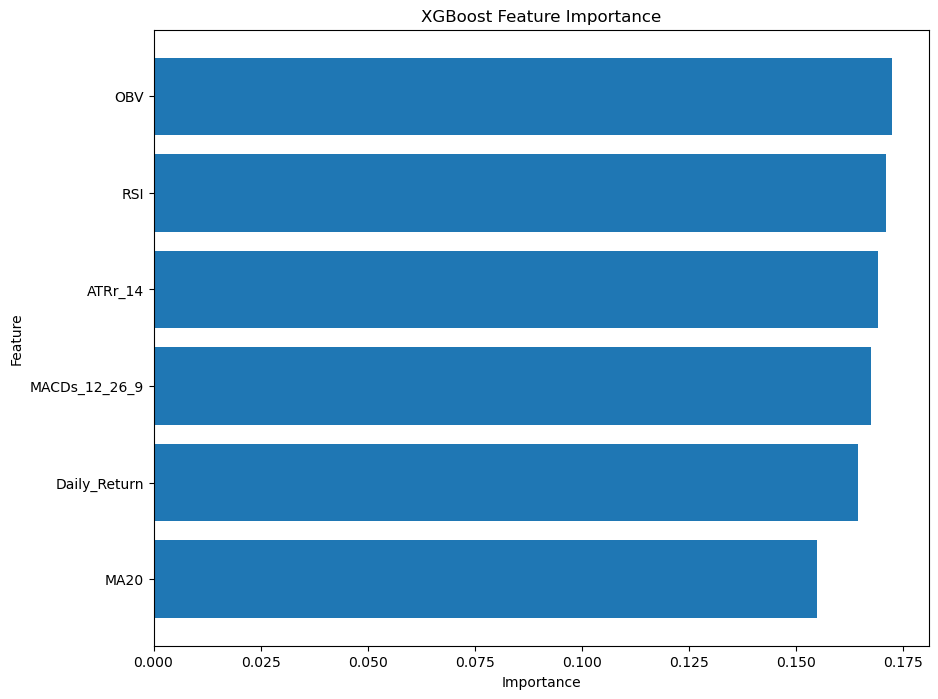

         feature  importance
1            OBV    0.172392
3            RSI    0.171108
2        ATRr_14    0.169291
5  MACDs_12_26_9    0.167683
0   Daily_Return    0.164620
4           MA20    0.154906


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained model
importances = xgb_model.feature_importances_

# Create a pandas DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.show()

# Print the DataFrame for the exact values
print(feature_importance_df)

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the grid of parameters to search
# We'll test a few common values for key hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1.0], # Fraction of data to use for each tree
    'colsample_bytree': [0.7, 1.0] # Fraction of features to use for each tree
}

# Create the Grid Search model
# cv=3 means it will use 3-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the process
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1 # This will print progress updates
)

# Fit the grid search to the data
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("\nBest parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("\n--- Best Model Performance ---")
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Model Accuracy: {accuracy_best * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Down', 'Up']))

Starting Grid Search...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:35:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002079811/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:35:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002079811/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:35:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002079811/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/seankimjr/miniconda3/envs


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

--- Best Model Performance ---
Model Accuracy: 52.56%

Classification Report:
              precision    recall  f1-score   support

        Down       0.49      0.37      0.42       607
          Up       0.54      0.66      0.60       683

    accuracy                           0.53      1290
   macro avg       0.52      0.52      0.51      1290
weighted avg       0.52      0.53      0.52      1290



/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:35:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002079811/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
